In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
# Cargar el dataset CIFAR-10
datos, metadatos = tfds.load("cifar10", as_supervised=True, with_info=True)
nombres_clases = metadatos.features["label"].names

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.O4RKGI_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.O4RKGI_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [ ]:
# Dividir los datos en entrenamiento y pruebas
datos_entrenamiento = datos["train"]
datos_pruebas = datos["test"]

In [ ]:
# Normalizar las imágenes de 0-255 a 0-1
def normalizar(imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32)
    imagenes = imagenes / 255.0
    return imagenes, etiquetas

In [ ]:
# Aplicar la normalización
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

In [ ]:
# Agregar en cache para mejorar el rendimiento
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

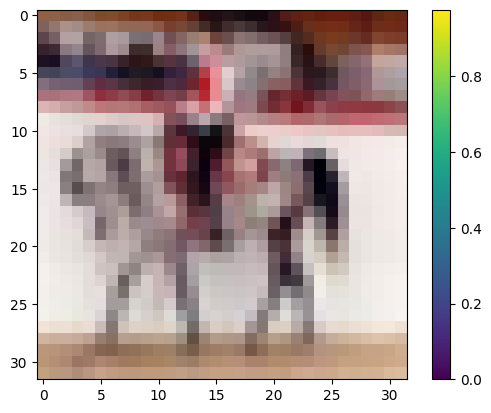

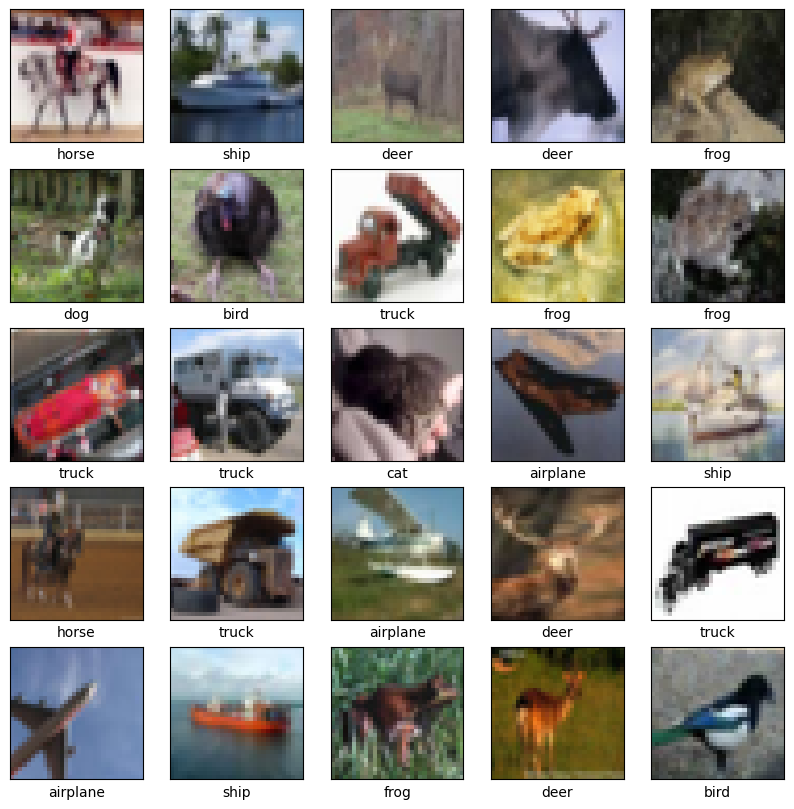

In [ ]:
# Mostrar algunas imágenes de ejemplo
for imagen, etiqueta in datos_entrenamiento.take(1):
    break

plt.figure()
plt.imshow(imagen)
plt.colorbar()
plt.show()

plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
    plt.subplot(5, 5, i+1)
    plt.imshow(imagen)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(nombres_clases[etiqueta])

plt.show()

In [ ]:
# Modelo CNN para CIFAR-10
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilar el modelo
modelo.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [ ]:
# Tamaño del lote
TAMANO_LOTE = 32

In [ ]:
# Preparar los datos para el entrenamiento y la prueba
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(50000).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)


In [ ]:
# Entrenar el modelo
entrenamiento = modelo.fit(
    datos_entrenamiento, epochs=15,
    steps_per_epoch=math.ceil(50000 / TAMANO_LOTE)
)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 43ms/step - accuracy: 0.3347 - loss: 1.8063
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.5558 - loss: 1.2434
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6271 - loss: 1.0715
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6566 - loss: 0.9778
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.6843 - loss: 0.8973
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.7076 - loss: 0.8354
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7289 - loss: 0.7837
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.7404 - loss: 0.7528
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7471 - loss: 0.7151
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.7659 - loss: 0.6710
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.7707 - loss: 0.6577
Epoch 12

In [ ]:
# Visualizar algunas predicciones
for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
    imagenes_prueba = imagenes_prueba.numpy()
    etiquetas_prueba = etiquetas_prueba.numpy()
    predicciones = modelo.predict(imagenes_prueba)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


In [ ]:
# Función para graficar imágenes con sus predicciones
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
    arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    etiqueta_prediccion = np.argmax(arr_predicciones)
    if etiqueta_prediccion == etiqueta_real:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                         100 * np.max(arr_predicciones),
                                         nombres_clases[etiqueta_real]),
               color=color)

In [ ]:
# Función para graficar las probabilidades de predicción
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
    arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    grafica = plt.bar(range(10), arr_predicciones, color="#777777")
    plt.ylim([0, 1])
    etiqueta_prediccion = np.argmax(arr_predicciones)

    grafica[etiqueta_prediccion].set_color('red')
    grafica[etiqueta_real].set_color('blue')

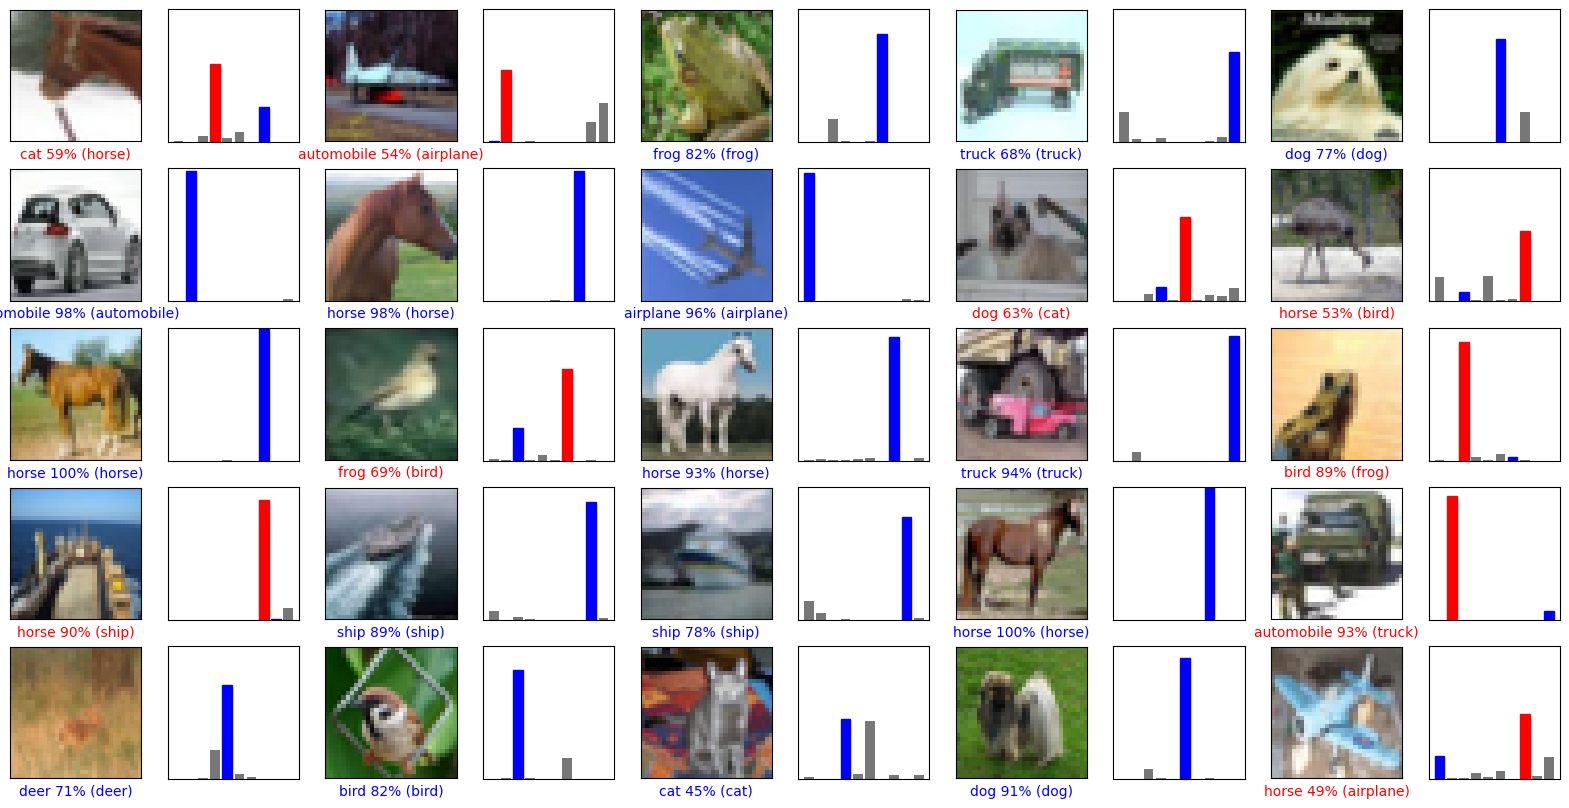

In [ ]:
# Mostrar una cuadrícula con varias imágenes y sus predicciones
filas = 5
columnas = 5
num_imagenes = filas * columnas
plt.figure(figsize=(2 * 2 * columnas, 2 * filas))
for i in range(num_imagenes):
    plt.subplot(filas, 2 * columnas, 2 * i + 1)
    graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
    plt.subplot(filas, 2 * columnas, 2 * i + 2)
    graficar_valor_arreglo(i, predicciones, etiquetas_prueba)